In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Préparation des données

In [2]:
# Import du jeu de données
dfCredit = pd.read_csv('credit.data', sep='\t')
nbColumns = len(dfCredit.columns)
print("nb of columns", nbColumns)
dfX = dfCredit.iloc[:,:nbColumns-1]
dfY = dfCredit.iloc[:,nbColumns-1]

nb of columns 16


In [3]:
dfCredit.head()
#Y.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,1,f,g.1,202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360,0,+


In [4]:
import re

"""
    Vérifie si une chaine correspond à un format numérique (entier ou flotant)
"""
def is_num(entry):
    _str = str(entry)
    #print("is_num", _str)
    regex_float = '[+-]?[0-9]+\.[0-9]+'
    regex_int = '[0-9]+'
    # Répérer les entiers
    if(re.search(regex_int, _str)):  
        #print(str, "Integer number")  
        return True
    # Répérer les flotants
    elif(re.search(regex_float, _str)):  
        #print(str, "Floating point number")  
        return True
    else:  
        #print(_str, "not a number")  
        return False

print(is_num('013'))


# Conversion de tous les éléments du tableau en float
def y_to_num(Y):
    #print("Y", Y[0],Y[1] )
    Y_num = np.zeros(len(Y));
    for idx in range(len(Y)):
        #print("step1",idx,Y[idx])
        if(Y[idx] == '+'):
            #print('set 1')
            Y_num[idx] = 1
    return Y_num

"""
    Vérifie si un ligne(tableau) contient au moins un élément Not-A-Number
"""
def has_nan(row):
    array_sum = np.sum(row)
    return np.isnan(array_sum)

# Transformation en array
arrayCredit = dfCredit.to_numpy()
# Extraction des variables caractéristiques
X = (dfCredit.iloc[:,:nbColumns-1]).to_numpy()
# Extraction de la varaiable à prédire
Y = (dfCredit.iloc[:,nbColumns-1]).to_numpy()
print("X", X.shape)
#print(arrayCredit, X,Y)

# Sélection des colonnes de type numérique ()
row1 = X[1,:]
print(row1, type(row1[1]))
numeric_columns=[]
numeric_columns = [is_num(row1[i]  )  for i in range(len(row1))]
cat_columns = [not is_num(row1[i]  )  for i in range(len(row1))]


    
print("numeric_columns", numeric_columns)
#selections = np.array([True, False, True])
X_num = X[:, numeric_columns]

"""
Y_num = np.zeros(len(Y));
# Conversion de tous les éléments du tableau en float
print("Y", Y[0],Y[1] )
lengthY = len(Y)
for idx in range(lengthY):
    #print("step1",idx,Y[idx])
    if(Y[idx] == '+'):
        #print('set 1')
        Y_num[idx] = 1
"""
Y_num = y_to_num(Y)


#print("y value",idx_row, Y[idx_row])
#print("Y_num", Y_num)


# Remplacer les '?' par des nan
X_num[X_num == '?'] = np.nan
# Forcer le type float
X_num = X_num.astype(float)
#print("X_num", X_num)



    
# Suppression des lignes comporanant un nan
print( "before NaN remove X_num", X_num.shape, "Y_num", Y_num.shape) 

selected_rows = []
X_clean = []
print("test1", X_num[1,:])
fNaN = float('nan')
for row in X_num:
    selected_rows.append(not has_nan(row))

X_num = X_num[selected_rows,:]
Y_num = Y_num[selected_rows]

MP = 100*np.sum(Y_num == 0)/len(Y)
BP = 100*np.sum(Y_num == 1)/len(Y)

print("after NaN remove X_num:", X_num.shape, "Y_num:", Y_num.shape) 

# A Enlever
#X_num_bk = X_num
#Y_num_bk = Y_num


True
X (687, 15)
['a' '24.50' 0.5 'u' 'g' 'q' 'h' 1.5 't' 'f' 0 'f' 'g' '280' 824] <class 'str'>
numeric_columns [False, True, True, False, False, False, False, True, False, False, True, False, False, True, True]
before NaN remove X_num (687, 6) Y_num (687,)
test1 [ 24.5   0.5   1.5   0.  280.  824. ]
after NaN remove X_num: (665, 6) Y_num: (665,)


(665,)


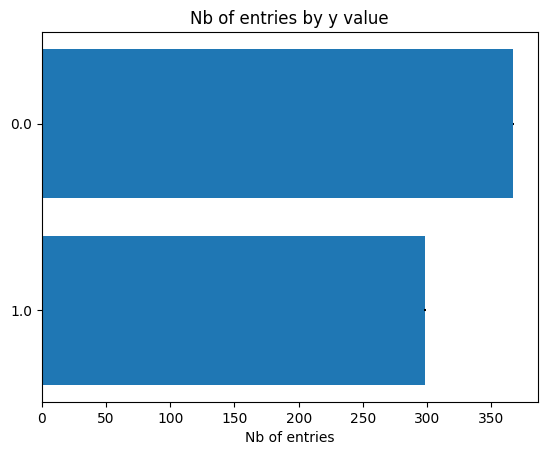

In [5]:
def group_list(list):       
    unique, counts = np.unique(list, return_counts=True)
    return dict(zip(unique, counts))

# Affichage
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
print(Y_num.shape)
mapY = group_list(Y_num)
#print("mapY", mapY)

plt.rcdefaults()
fig, ax = plt.subplots()

x_values=[]
y_values=[]
for val_y in mapY :
    val = mapY[val_y]
    y_values.append(val)

x_values = mapY.keys()
y_pos = np.arange(len(x_values))
#print("y_values", y_values)
error = np.random.rand(len(x_values))

ax.barh(y_pos, y_values, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(x_values)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Nb of entries')
ax.set_title('Nb of entries by y value')

plt.show()


In [6]:
# Normalisation 

from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
SC.fit(X_num)
X_norm = SC.transform(X_num)

print(X_norm.shape)



(665, 6)


# Apprentissage

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [8]:

""" 
    Fontion utilitaire d'affichage des résultat d'un algorithme : matrice de confusion, accuracy, precision
"""
def log_result(Y_test, Y_pred, algoType, note):
    print("--- ", algoType, " ---" )
    m_confusion = confusion_matrix(Y_test, Y_pred )
    print("Matrice de confusion", algoType, note)
    print(m_confusion)
    acc = round(100*accuracy_score(Y_test, Y_pred), 2)
    prec = round(100*precision_score(Y_test, Y_pred), 2)
    print(algoType, note, ' : Accuracy  ', acc , 'Precision' , prec)
    

def run_classifiers(X,Y,list_classifiers):
    # Estimation par 10 fold cross-validation du critère qu’il vous semble le plus pertinent entre le
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    for i in list_classifiers:
        classifier = list_classifiers[i]
        time_before = time.time()
        cv_acc = cross_val_score(classifier, X, Y, cv=kf)
        #print("run_classifiers cv_acc", cv_acc, X, Y)
        time_after = time.time()
        # Estimation du temps d’exécution de l’algorithme d’apprentissage (c.f. time.time())
        duraction_sec = time_after - time_before
        # Estimation de l’accuracy et de l’AUC (Aire sous la courbe ROC) par 10 fold cross-validation (c.f.
        #accuracy = np.mean(cv_acc)    
        #std = np.std(cv_acc)
        cv_precision = cross_val_score(classifier, X, Y, cv=kf, scoring='precision')
        cv_auc = cross_val_score(classifier, X, Y, cv=kf, scoring='roc_auc')
        #print(X.shape, Y.shape, cv_acc)
        print(" Accuracy for {0} is: {1:.3f} +/- {2:.3f}  duration : {3:.3f} sec".format(i, np.mean(cv_acc), np.std(cv_acc), duraction_sec))
        print("Precision for {0} is: {1:.3f} +/- {2:.3f}  duration : {3:.3f} sec".format(i, np.mean(cv_precision), np.std(cv_precision), duraction_sec))
        print("   A.U.C. for {0} is: {1:.3f} +/- {2:.3f}  duration : {3:.3f} sec".format(i, np.mean(cv_auc), np.std(cv_auc), duraction_sec))
    print("--- run_classifiers end ---")

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import recall_score
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

import time

""" Fonction qui applique successivement les 3 algorithmes : 
        . Arbre de décision
        . K plus proches voisins
        . Perceptron multi-couches
"""

list_classifiers = {
  # NaiveBayesSimple
     'GNB' : GaussianNB()
  # Un arbre CART
    ,'CART': DecisionTreeClassifier(criterion = 'gini')
  # Un arbre ID3
    ,'ID3' : DecisionTreeClassifier(criterion = 'entropy',max_depth=8,splitter='best')
  # Decision Stump
    ,'STRUMP':  DecisionTreeClassifier(max_depth=1)
  # MultilayerPerceptron à deux couches de tailles respectives 20 et 10 par exemple
    ,'MLP' : MLPClassifier(  hidden_layer_sizes=(20, 10), alpha=0.001, max_iter=200)
  # k-plus-proches-voisins avec k=5 par exemple
    ,'KNN' : KNeighborsClassifier(n_neighbors=5)
  # Bagging avec 50 classifieurs par exemple
    ,'BC' : BaggingClassifier(n_estimators=50)
  # AdaBoost avec 50 classifieurs par exemple
    ,'ADB' : AdaBoostClassifier(n_estimators=50) 
  # Random Forest avec 50 classifieurs par exemple
    ,'RF'  : RandomForestClassifier(n_estimators=50)
}


run_classifiers(X_norm, Y_num, list_classifiers)

# TODO : comparer les résultats avec ceux de la question précédente



 Accuracy for GNB is: 0.714 +/- 0.058  duration : 0.034 sec
Precision for GNB is: 0.842 +/- 0.105  duration : 0.034 sec
   A.U.C. for GNB is: 0.793 +/- 0.057  duration : 0.034 sec
 Accuracy for CART is: 0.695 +/- 0.034  duration : 0.048 sec
Precision for CART is: 0.670 +/- 0.079  duration : 0.048 sec
   A.U.C. for CART is: 0.703 +/- 0.046  duration : 0.048 sec
 Accuracy for ID3 is: 0.735 +/- 0.058  duration : 0.047 sec
Precision for ID3 is: 0.729 +/- 0.085  duration : 0.047 sec
   A.U.C. for ID3 is: 0.745 +/- 0.049  duration : 0.047 sec
 Accuracy for STRUMP is: 0.744 +/- 0.054  duration : 0.029 sec
Precision for STRUMP is: 0.868 +/- 0.061  duration : 0.029 sec
   A.U.C. for STRUMP is: 0.723 +/- 0.035  duration : 0.029 sec
 Accuracy for MLP is: 0.786 +/- 0.058  duration : 11.904 sec
Precision for MLP is: 0.823 +/- 0.084  duration : 11.904 sec
   A.U.C. for MLP is: 0.844 +/- 0.055  duration : 11.904 sec
 Accuracy for KNN is: 0.753 +/- 0.041  duration : 0.131 sec
Precision for KNN is: 0.7

# Traitement des données manquantes

In [10]:
from sklearn.impute import SimpleImputer

cat_columns_ids0 = [0,3,4,5,6,8,9,11,12]
cat_columns_ids = []
num_columns_ids = []
for idx in range(len(cat_columns)):
    if(cat_columns[idx]):
        cat_columns_ids.append(idx)
    else:
        num_columns_ids.append(idx)

# Pour les variables catégorielles
print("cat_columns_ids", cat_columns_ids)
X_cat = np.copy(X[:, cat_columns_ids])
print("step10 X_cat", X_cat[0:3,:]  )
for col_id in range(len(cat_columns_ids)):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
    X_cat[:, col_id] = val_idx
imp_cat = SimpleImputer(missing_values=0, strategy='most_frequent')
 #imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])

print("step1 X_cat  ", X_cat.shape, X_cat[0:3,:] )


X_num = np.copy(X[:, num_columns_ids])

print("step2 X_num  ", X_num.shape, X_num[0:3,:] )
# Pour les variables numériques
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)

print("step3 X_num  ", X_num.shape, X_num[0:3,:] )

# Normalisation des données numérique obtenues
SC = StandardScaler()
SC.fit(X_num)
X_num_norm = SC.transform(X_num)
print("X_num_norm", X_num_norm.shape, X_num_norm[0:3,:])



# Conversion des variables  en binaire
from sklearn.preprocessing import OneHotEncoder

X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()
print("X_cat", X_cat.shape, X_cat[0:1,:]   )
print("X_cat_bin", X_cat_bin.shape, X_cat_bin[0:1,:])




cat_columns_ids [0, 3, 4, 5, 6, 8, 9, 11, 12]
step10 X_cat [['a' 'u' 'g' 'q' 'h' 't' 't' 'f' 'g']
 ['a' 'u' 'g' 'q' 'h' 't' 'f' 'f' 'g']
 ['b' 'u' 'g' 'w' 'v' 't' 't' 't' 'g']]
step1 X_cat   (687, 9) [[1 2 1 11 4 1 1 0 0]
 [1 2 1 11 4 1 0 0 0]
 [2 2 1 13 8 1 1 1 0]]
step2 X_num   (687, 6) [['58.67' 4.46 3.04 6 '43' 560]
 ['24.50' 0.5 1.5 0 '280' 824]
 ['27.83' 1.54 3.75 5 '100' 3]]
step3 X_num   (687, 6) [[ 58.67   4.46   3.04   6.    43.   560.  ]
 [ 24.5    0.5    1.5    0.   280.   824.  ]
 [ 27.83   1.54   3.75   5.   100.     3.  ]]
X_num_norm (687, 6) [[ 2.30690858 -0.06337714  0.24237488  0.73962742 -0.81775732 -0.0883501 ]
 [-0.59647927 -0.85885021 -0.21731315 -0.49318464  0.55688632 -0.03774986]
 [-0.31353278 -0.64993809  0.45430897  0.53415874 -0.48714683 -0.19510894]]
X_cat (687, 9) [[1 2 1 11 4 1 1 0 0]]
X_cat_bin (687, 40) [[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0.]]


In [12]:
# Concaténation finale
X_transformed = np.concatenate((X_num_norm, X_cat_bin), axis=1)


Y_num = y_to_num(Y)
print("Y_num", Y_num[0:20])

# Application des classifieurs
#print("X_Array_transformed", X_Array_transformed.shape, X_Array_transformed[0:1,:], Y_num.shape)
print("X_transformed", X_transformed.shape, Y_num.shape)


run_classifiers(X_transformed, Y_num, list_classifiers)



Y_num [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
X_transformed (687, 46) (687,)
 Accuracy for GNB is: 0.712 +/- 0.060  duration : 0.034 sec
Precision for GNB is: 0.878 +/- 0.102  duration : 0.034 sec
   A.U.C. for GNB is: 0.881 +/- 0.045  duration : 0.034 sec
 Accuracy for CART is: 0.818 +/- 0.039  duration : 0.091 sec
Precision for CART is: 0.770 +/- 0.058  duration : 0.091 sec
   A.U.C. for CART is: 0.803 +/- 0.038  duration : 0.091 sec
 Accuracy for ID3 is: 0.834 +/- 0.035  duration : 0.102 sec
Precision for ID3 is: 0.790 +/- 0.058  duration : 0.102 sec
   A.U.C. for ID3 is: 0.836 +/- 0.046  duration : 0.102 sec
 Accuracy for STRUMP is: 0.856 +/- 0.051  duration : 0.038 sec
Precision for STRUMP is: 0.782 +/- 0.079  duration : 0.038 sec
   A.U.C. for STRUMP is: 0.865 +/- 0.050  duration : 0.038 sec
 Accuracy for MLP is: 0.870 +/- 0.031  duration : 15.168 sec
Precision for MLP is: 0.829 +/- 0.076  duration : 15.168 sec
   A.U.C. for MLP is: 0.924 +/- 0.033  duration

In [ ]:
# TEST  (A ENLEVER)
if(1==0):
    print("step000")

    Y_num2 = Y.copy()
    # Conversion des éléments du tableau en float
    print("Y", Y[0:20])
    Y_num2[Y_num2=='+']=int(1) #float(1.0)
    Y_num2[Y_num2=='-']=int(0) #float(0.0)

    Y_num2[1==1] = Y_num2.astype('int')

    for i,y in enumerate(Y_num2):
        Y_num2[i]=y.astype('int')

    print("Y_num2", Y_num2)

    KNN = KNeighborsClassifier(n_neighbors=5)
    KNN.fit(X_num, Y_num2)
